## Thinking1：GCN/Graph Embedding 都有哪些应用场景？
### answer：大规模交通路网速度预测、社交网络分析、生物网络、知识图谱、推荐系统、金融风控等。

## Thinking3:在文本分类中，如何使用Graph Embedding，请说明简要的思路？
### answer：1、将文本数据构造成图（包含点和边）；2、从图形结构上获取邻接矩阵，然后计算度矩阵，进而获得拉普拉斯矩阵；3、构建两层GCN。

In [5]:
#pip install node2vec

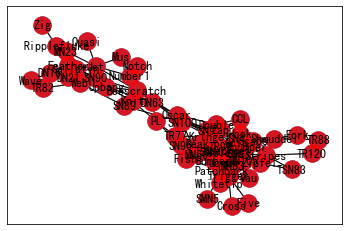

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']
['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99'

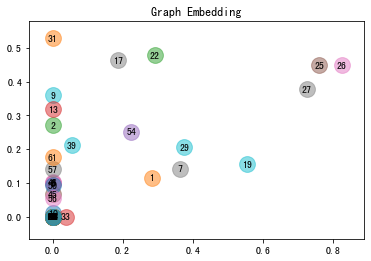

output(去掉relu)=
: [[-0.80419593 -0.19080683]
 [ 0.57379969  0.19562769]
 [-0.40150675  0.38777936]
 [-1.25934656 -1.11608755]
 [-0.40925714 -0.16542064]
 [-0.58931452  0.19078109]
 [-0.17088241  0.25400048]
 [ 0.58570359  0.00911874]
 [-0.87989985 -0.67219609]
 [-0.07625789  0.62334483]
 [-0.40709589  0.10973014]
 [ 0.55976417  0.80808898]
 [-0.95252911 -1.48863332]
 [-0.02736146  0.53606574]
 [-1.43800397 -0.85815013]
 [-0.51649399 -0.44049787]
 [-1.5739739  -0.97873023]
 [ 0.53416751  0.84524241]
 [-0.83234376 -0.66451399]
 [ 0.80193386  0.05699868]
 [-0.94690589 -0.60220982]
 [-1.05163225 -0.79305374]
 [ 1.16363183  1.68324168]
 [-1.25913883 -0.96941424]
 [-0.9826339  -0.8209365 ]
 [ 1.17639328  0.48178783]
 [ 1.18275534  0.39433239]
 [ 1.06602812  0.35547991]
 [-0.23734755 -0.12748266]
 [ 0.58977362  0.19906041]
 [-0.82512394 -0.66155771]
 [ 0.0905094   0.76175051]
 [-0.6056074  -0.16082092]
 [-0.27586856 -0.77043535]
 [-1.03099192 -0.59091784]
 [-1.33573274 -0.72891486]
 [-1.59200

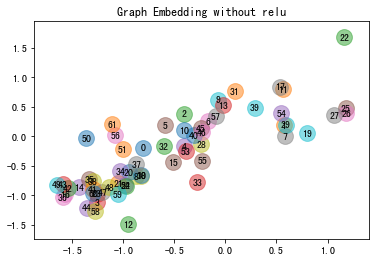

In [46]:
#Action 1

# 使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

# 对网络G进行可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    nx.draw_networkx(G, pos, edges=edges);
    nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_size=300, node_color='r', alpha=0.8)
    nx.draw_networkx_edges(G, pos, edgelist=edges,alpha =0.4)
    plt.show()

# 数据加载，构造图
G = nx.read_gml('dolphins.gml')
#print(G)
#print(type(G))

# 可视化
plot_graph(G)
print(list(G.nodes()))
#print(G.nodes['BrighamYoung']['value'])
#print(G.nodes)
#print(G.nodes[:,'value'])


# 构建GCN，计算A_hat和D_hat矩阵
order = sorted(list(G.nodes()))
#按照字母顺序排序
print(order)
A = to_numpy_matrix(G, nodelist=order)
#邻接矩阵
print('A=\n', A)
# 生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A + I
print('A_hat=\n', A_hat)

# D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat, axis=0))[0]
print('D_hat=\n', D_hat)

# 得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n', D_hat)

# 初始化权重, normal 正态分布 loc均值 scale标准差
W_1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W_2 = np.random.normal(loc=0, size=(W_1.shape[1], 2))
print('W_1=\n', W_1)
print('W_2=\n', W_2)

# x<0时 结果=0; x>=0时，结果=x
def relu(x):
    return (abs(x)+x)/2

# 叠加GCN层，这里只使用单位矩阵作为特征表征，即每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat, D_hat, X, W):
	return relu(D_hat**-1 * A_hat * X * W)
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print('output=\n', output)
# 提取特征表征
feature_representations = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representations[nodes[i]] = np.array(output)[i]
print('feature_representations=\n', feature_representations)

# 绘制output，节点GCN embedding可视化
def plot_node(output, title):
    for i in range(len(nodes)):
        node_name = nodes[i]
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1] ,label=str(i),alpha=0.5,s = 250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1] ,i, horizontalalignment='center',verticalalignment='center', fontdict={'color':'black'})
    plt.title(title)
    plt.show()
plot_node(output, 'Graph Embedding')

# 尝试去掉激活函数relu，重新运行一遍，发现效果反而更好
def gcn_layer(A_hat, D_hat, X, W):
    return D_hat**-1 * A_hat * X * W
H_1 = gcn_layer(A_hat, D_hat, I, W_1)
H_2 = gcn_layer(A_hat, D_hat, H_1, W_2)
output = H_2
print("output(去掉relu)=\n:",output)

plot_node(output, 'Graph Embedding without relu')


In [38]:
!pip install xgboost -i https://pypi.tuna.tsinghua.edu.cn/simple 

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 127.6 MB 19 kB/s s eta 0:00:01                          | 3.4 MB 17.7 MB/s eta 0:00:08        | 7.5 MB 17.7 MB/s eta 0:00:07�▉                             | 11.2 MB 17.7 MB/s eta 0:00:07


In [40]:
#Action 2

import pandas as pd
import numpy as np

#数据加载
train_data = pd.read_csv('used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv('used_car_testB_20200421.csv', sep=' ')
print(train_data.info)

#查看数据缺失值
print(train_data.isnull().any()) # True or False
print(train_data.isnull().sum())
'''
#null可视化
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
missing = train_data.isnull().sum()
missing = missing(missing>0)
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

import missingno as msno
sample = train_data.sample(1000)
msno.matrix(sample)
plt.show()
msno.bar(sample)
plt.show()
msno.heatmap(sample)
plt.show()

#一行代码生成报告
import pandas_profiling as pp
report = pp.ProfileReport(train_data)
#导出为html
report.to_file('report.html')

import matplotlib.pyplot as plt
plt.figure(1)
plt.title('price histgram')
plt.hist(train_data['price'], color ='red')
plt.figure(2)
plt.title('log(price)histgram')
plt.hist(np.log(train_data['price']), color ='red')
plt.show()

import seaborn as sns
#计算偏度和峰度（与正态分布进行比较
sns.distplot(train_data['price'])
plt.show()
print("Skewness: %f" % train_data['price'].skew())
print("Kurtosis: %f" % train_data['price'].kurt())
'''
print(train_data['notRepairedDamage'].value_counts())
train_data['notRepairedDamage'].replace('-', '0.0', inplace=True)
test_data['notRepairedDamage'].replace('-', '0.0', inplace=True)

train_data = train_data.astype('float')
test_data = test_data.astype('float')

#提取数值类型的特征列名
numerical_cols = train_data.select_dtypes(exclude='object').columns
print('numerical_cols=\n',numerical_cols)

categorical_cols = train_data.select_dtypes(include='object').columns
print('categorical_cols\n',categorical_cols)

#特征选择
feature_cols = [col for col in numerical_cols if col not in ['SaleID', 'regDate', 'creatDate', 'price']]
print(feature_cols)

#准备训练数据
X_data = train_data[feature_cols]
y_data = train_data['price']

X_test = test_data[feature_cols]
print('X_train shape:', X_data.shape)
print('X_test shape:', X_data.shape)

#设定统计函数
def show_stats(data):
    print('min', np.min(data))
    print('max', np.max(data))
    print('ptp', np.ptp(data))
    print('mean', np.mean(data))
    print('std', np.std(data))
    print('var', np.var(data))
    
    #统计y_data的情况
show_stats(y_data)
#缺省值用-1补全
X_data = X_data.fillna(-1)
X_test = X_test.fillna(-1)

#!pip install xgboost -i https://pypi.tuna.tsinghua.edu.cn/simple 
import xgboost as xgb
model = xgb.XGBRegressor(n_estimator=150, learning_rate=0.01, gamma=0, subsample=0.8, colsample_bytree=0.9, max_depth=7)
model.fit(X_data, y_data)
print('XGB预测结果的统计情况')
predict_y = model.predict(X_test)
show_stats(predict_y)

answer = pd.DataFrame()
answer['SaleID'] = test_data.SaleID
answer['price'] = predict_y
answer.to_csv('./ans_xgb.csv', index=False)

<bound method DataFrame.info of         SaleID    name   regDate  model  brand  bodyType  fuelType  gearbox  \
0            0     736  20040402   30.0      6       1.0       0.0      0.0   
1            1    2262  20030301   40.0      1       2.0       0.0      0.0   
2            2   14874  20040403  115.0     15       1.0       0.0      0.0   
3            3   71865  19960908  109.0     10       0.0       0.0      1.0   
4            4  111080  20120103  110.0      5       1.0       0.0      0.0   
...        ...     ...       ...    ...    ...       ...       ...      ...   
149995  149995  163978  20000607  121.0     10       4.0       0.0      1.0   
149996  149996  184535  20091102  116.0     11       0.0       0.0      0.0   
149997  149997  147587  20101003   60.0     11       1.0       1.0      0.0   
149998  149998   45907  20060312   34.0     10       3.0       1.0      0.0   
149999  149999  177672  19990204   19.0     28       6.0       0.0      1.0   

        power  kilo